In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

import arrow
import datetime as dt
from sklearn.utils import resample 
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn import ensemble
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
%matplotlib inline
rcParams['figure.figsize'] = 10, 8
sb.set_style('whitegrid')

In [5]:
comp = pd.read_csv('comp_filter.csv')

In [6]:
comp

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,label
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05,0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14,0
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30,0
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19,0
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66292,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,1587301,operating,CHN,22,Beijing,Beijing,1,NaN,2012-04-01,2012-04-01,0
66293,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,114304,operating,HRV,15,Split,Split,4,2012-05-13,2011-11-01,2014-03-01,0
66294,/organization/Áeron,ÁERON,http://www.aeron.hu/,NaN,-,operating,NaN,NaN,NaN,NaN,1,2011-01-01,2014-08-01,2014-08-01,0
66295,/organization/Ôasys-2,Ôasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,18192,operating,USA,CA,SF Bay Area,San Francisco,1,2014-01-01,2015-01-01,2015-01-01,0


In [7]:
comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66297 entries, 0 to 66296
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   permalink          66297 non-null  object
 1   name               66296 non-null  object
 2   homepage_url       61259 non-null  object
 3   category_list      63165 non-null  object
 4   funding_total_usd  66297 non-null  object
 5   status             66297 non-null  object
 6   country_code       59351 non-null  object
 7   state_code         57764 non-null  object
 8   region             58281 non-null  object
 9   city               58283 non-null  object
 10  funding_rounds     66297 non-null  int64 
 11  founded_at         51093 non-null  object
 12  first_funding_at   66297 non-null  object
 13  last_funding_at    66297 non-null  object
 14  label              66297 non-null  int64 
dtypes: int64(2), object(13)
memory usage: 7.6+ MB


In [8]:
# convert '-' to NAN in comp['funding_total_usd']:
comp['funding_total_usd'] = pd.to_numeric(comp['funding_total_usd'], errors='coerce')

In [10]:
# select meaningful features
comp_data = comp[['name','funding_total_usd','country_code','funding_rounds',#'founded_at',
                  'first_funding_at','last_funding_at','category_list','label']]

In [11]:
comp_data.isnull().sum()

name                     1
funding_total_usd    12759
country_code          6946
funding_rounds           0
first_funding_at         0
last_funding_at          0
category_list         3132
label                    0
dtype: int64

In [12]:
# filter out all the nan data
comp_data.dropna(inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13324\60160544.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp_data.dropna(inplace=True)


In [13]:
comp_data.isnull().sum()

name                 0
funding_total_usd    0
country_code         0
funding_rounds       0
first_funding_at     0
last_funding_at      0
category_list        0
label                0
dtype: int64

In [14]:
comp_data['country_code']

0        IND
1        USA
3        CHN
5        HKG
6        CAN
        ... 
66290    AUT
66291    GBR
66292    CHN
66293    HRV
66295    USA
Name: country_code, Length: 48404, dtype: object

In [15]:
comp_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48404 entries, 0 to 66295
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               48404 non-null  object 
 1   funding_total_usd  48404 non-null  float64
 2   country_code       48404 non-null  object 
 3   funding_rounds     48404 non-null  int64  
 4   first_funding_at   48404 non-null  object 
 5   last_funding_at    48404 non-null  object 
 6   category_list      48404 non-null  object 
 7   label              48404 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 3.3+ MB


In [16]:
# comp_data.head(10)
# comp_data is a clean dataset and ready to use!!!

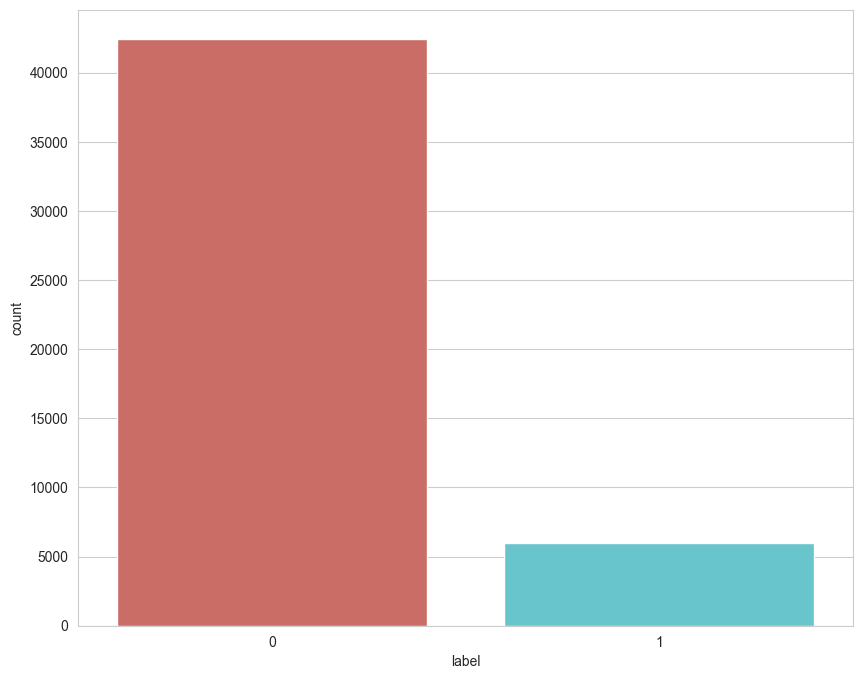

In [17]:
label = sb.countplot(x='label',data=comp_data, palette='hls')
fig_ = label.get_figure()
fig_.savefig('label.png')

# Baseline Model w/ Logistic Regression

## 1.1 Logistic Regression Model w/ only numerical features

In [18]:
# Only select the numerical data as features
logReg_data = comp_data[['funding_total_usd','funding_rounds','label']]

In [19]:
logReg_data.label.value_counts()[1]

5976

In [20]:
# handling with the imbalance data problem
def balance(df):
    
    # Separate majority and minority classes
    df_majority = df[df.label==0]
    df_minority = df[df.label==1]
    
    # n is the number of minority class (label = 1)
    n = df.label.value_counts()[1]

    # # Upsample minority class
    # df_minority_upsampled = resample(df_minority, 
    #                                  replace=True,     # sample with replacement
    #                                  n_samples=47312,    # to match majority class
    #                                  random_state=123) # reproducible results

    # downsample majority class
    df_majority_downsampled = resample(df_majority, 
                                     replace=False,     # sample with replacement
                                     n_samples=n,    # to match majority class
                                     random_state=123) # reproducible results

    # Combine majority class with upsampled minority class
    # df_upsampled = pd.concat([df_majority, df_minority_upsampled])
    df_downsampled = pd.concat([df_minority, df_majority_downsampled])
    
    return df_downsampled

In [21]:
logReg_data_balanced = balance(logReg_data)

In [22]:
logReg_data_balanced.label.value_counts()

1    5976
0    5976
Name: label, dtype: int64

In [23]:
X = logReg_data_balanced.iloc[:,:-1]

In [24]:
y = logReg_data_balanced.iloc[:,-1]

In [25]:
# conduct the feature scaling/normalization 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression()

In [27]:
y_pred = LogReg.predict(X_test)

In [28]:
sum(y_pred)

788

In [29]:
accuracy_score(y_test, y_pred)

0.5972396486825596

In [30]:
y_train_pred = LogReg.predict(X_train)
accuracy_score(y_train, y_train_pred)

0.6089321200711223

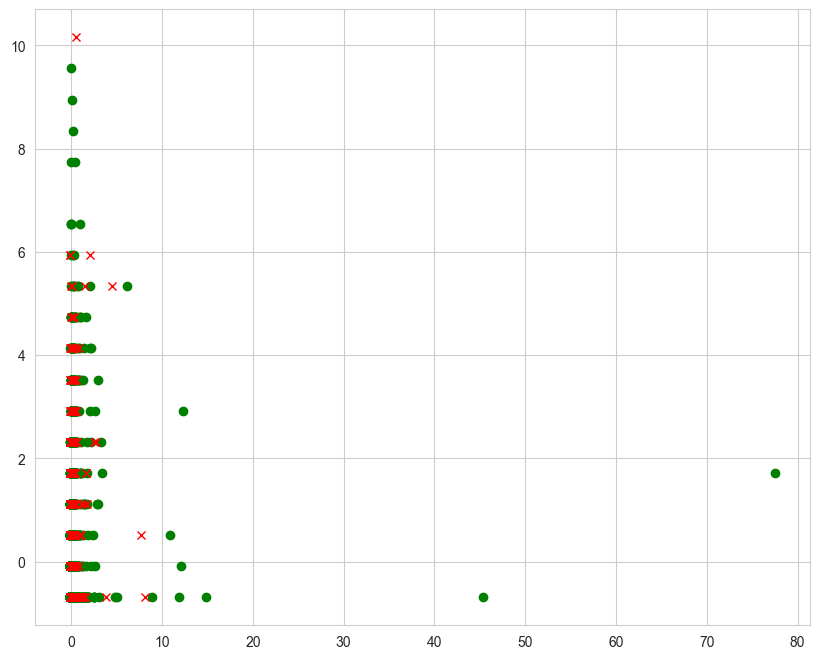

In [31]:
# X_train_ = np.clip(X_train, None, 5)

plt.plot(X_train[np.where(y_train == 1),0], X_train[np.where(y_train == 1),1], 'go') 
         #X_train_[np.where(y_train == 0),0], X_train_[np.where(y_train == 0),1], 'rx')
plt.plot(X_train[np.where(y_train == 0),0], X_train[np.where(y_train == 0),1], 'rx')
plt.savefig('LogReg_numOnly_train.png')
plt.show()


## 1.2 Logistic Regression Model w/ all features

In [32]:
# load LogReg_data to preprocess the encoding and handle with the timestamp features
LogReg_data = comp_data.copy()

In [33]:
LogReg_data.info()
LogReg_data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48404 entries, 0 to 66295
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               48404 non-null  object 
 1   funding_total_usd  48404 non-null  float64
 2   country_code       48404 non-null  object 
 3   funding_rounds     48404 non-null  int64  
 4   first_funding_at   48404 non-null  object 
 5   last_funding_at    48404 non-null  object 
 6   category_list      48404 non-null  object 
 7   label              48404 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 3.3+ MB


,name,funding_total_usd,country_code,funding_rounds,first_funding_at,last_funding_at,category_list,label
0,#fame,10000000.0,IND,1,2015-01-05,2015-01-05,Media,0
1,:Qounter,700000.0,USA,2,2014-03-01,2014-10-14,Application Platforms|Real Time|Social Network...,0
3,0-6.com,2000000.0,CHN,1,2008-03-19,2008-03-19,Curated Web,0
5,01Games Technology,41250.0,HKG,1,2014-07-01,2014-07-01,Games,0
6,Ondine Biomedical Inc.,762851.0,CAN,2,2009-09-11,2009-12-21,Biotechnology,0
...,...,...,...,...,...,...,...,...
66290,Zytoprotec,2686600.0,AUT,1,2013-01-29,2013-01-29,Biotechnology,0
66291,Zzish,1120000.0,GBR,3,2014-03-24,2015-02-25,Analytics|Android|Developer APIs|Education|Gam...,0
66292,ZZNode Science and Technology,1587301.0,CHN,1,2012-04-01,2012-04-01,Enterprise Software,0
66293,Zzzzapp Wireless ltd.,114304.0,HRV,4,2011-11-01,2014-03-01,Advertising|Mobile|Web Development|Wireless,0


In [35]:
# first balance the dataset
LogReg_data_balanced = balance(LogReg_data)

In [36]:
LogReg_data_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11952 entries, 15 to 20949
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               11952 non-null  object 
 1   funding_total_usd  11952 non-null  float64
 2   country_code       11952 non-null  object 
 3   funding_rounds     11952 non-null  int64  
 4   first_funding_at   11952 non-null  object 
 5   last_funding_at    11952 non-null  object 
 6   category_list      11952 non-null  object 
 7   label              11952 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 840.4+ KB


In [37]:
LogReg_data_balanced.loc[35632]

name                                    Miaopai
funding_total_usd                   250000000.0
country_code                                CHN
funding_rounds                                2
first_funding_at                     2014-09-25
last_funding_at                      2015-11-24
category_list        Apps|Venture Capital|Video
label                                         0
Name: 35632, dtype: object

In [38]:
# # Encode 'category' features, label them with values between 0 and n_classes-1
# df = LogReg_data_balanced
# col = 'category_1'
# le = preprocessing.LabelEncoder()
# col_label = le.fit_transform(list(df[col]))
# df[col + '_encode']= col_label #pd.Series(col_label)

In [39]:
LogReg_data_balanced.loc[35632]

name                                    Miaopai
funding_total_usd                   250000000.0
country_code                                CHN
funding_rounds                                2
first_funding_at                     2014-09-25
last_funding_at                      2015-11-24
category_list        Apps|Venture Capital|Video
label                                         0
Name: 35632, dtype: object

In [40]:
# Encode 'category' features, label them with values between 0 and n_classes-1
def encoder_cat(df, col):
    le = preprocessing.LabelEncoder()
    col_label = le.fit_transform(list(df[col]))
    df[col]=col_label
    return le

In [41]:
# encode text features
def encoder_text(df, col, min_df=10):
    df[col] = df[col].astype(str)
    vectorizer = CountVectorizer(min_df=min_df)
    vectorizer.fit(df[col])
    col_bag_of_words = vectorizer.transform(df[col])
    return col_bag_of_words

In [43]:
# Only run once !!!
country_list = encoder_cat(LogReg_data_balanced, 'country_code')
category_list = encoder_cat(LogReg_data_balanced, 'category_list')

In [44]:
LogReg_data_balanced

,name,funding_total_usd,country_code,funding_rounds,first_funding_at,last_funding_at,category_list,label
15,1 Mainstream,5000000.0,82,1,2015-03-17,2015-03-17,984,1
20,1000 Markets,500000.0,82,1,2009-05-15,2009-05-15,1193,1
23,1000memories,2535000.0,82,2,2010-01-01,2011-02-16,2817,1
31,100Plus,1250000.0,82,2,2011-11-02,2011-11-30,552,1
32,1010data,35000000.0,82,1,2010-03-08,2010-03-08,5377,1
...,...,...,...,...,...,...,...,...
37610,MyClasses,38598.0,19,1,2012-10-01,2012-10-01,539,0
59402,Triptable,40000.0,62,2,2014-10-14,2015-03-15,3519,0
51944,Sitter Inc.,140000.0,82,1,2015-08-21,2015-08-21,1350,0
24551,HackerEarth,500000.0,34,2,2013-06-01,2014-02-24,5377,0


In [45]:
country_list.classes_

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87])

In [46]:
category_list.classes_

array(['3D Printing', '3D Printing|Art|Beauty|Fashion',
       '3D Printing|Biotechnology|Health and Wellness', ...,
       'iPhone|News', 'iPhone|Software|Sports|Windows Phone 7',
       'mHealth|Mobile'], dtype='<U328')

In [59]:
# calculate the duration between 'first_funding_at' and 'last_funding_at'
t1 = pd.to_datetime(LogReg_data_balanced.first_funding_at, errors='coerce')
#print(t1)
#t1 = pd.to_timedelta(t1).dt.days
t2 = pd.to_datetime(LogReg_data_balanced.last_funding_at, errors='coerce')
#t2 = pd.to_timedelta(t2).dt.days

In [60]:
LogReg_data_balanced['funding_duration'] = (t2 - t1).dt.days

In [61]:
LogReg_data_balanced.head()

,name,funding_total_usd,country_code,funding_rounds,first_funding_at,last_funding_at,category_list,label,funding_duration
15,1 Mainstream,5000000.0,82,1,2015-03-17,2015-03-17,984,1,0
20,1000 Markets,500000.0,82,1,2009-05-15,2009-05-15,1193,1,0
23,1000memories,2535000.0,82,2,2010-01-01,2011-02-16,2817,1,411
31,100Plus,1250000.0,82,2,2011-11-02,2011-11-30,552,1,28
32,1010data,35000000.0,82,1,2010-03-08,2010-03-08,5377,1,0


In [62]:
X = LogReg_data_balanced[['funding_total_usd','funding_rounds','funding_duration','category_list','country_code']]

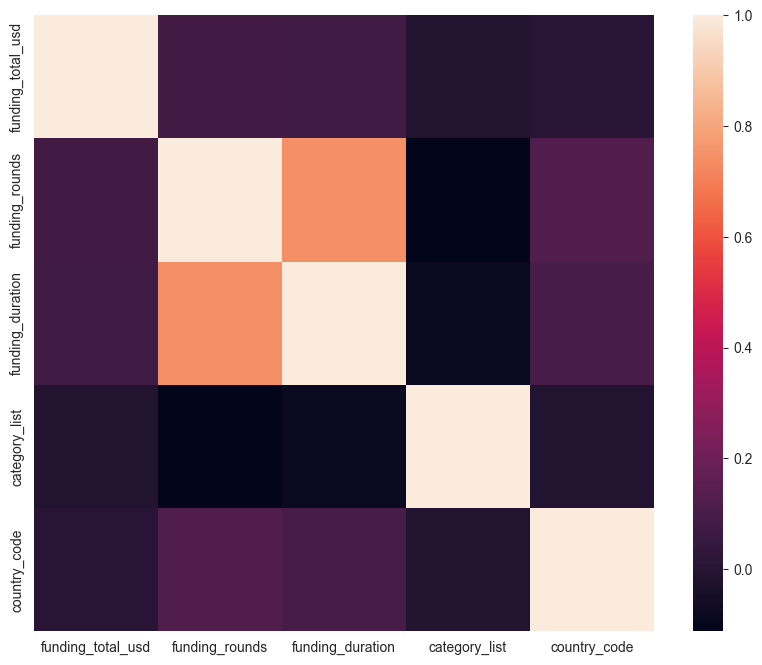

In [63]:
# plot the correlation between the features
corr = sb.heatmap(X.corr())
fig = corr.get_figure()
fig.savefig('corr.png') 

In [64]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11952 entries, 15 to 20949
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   funding_total_usd  11952 non-null  float64
 1   funding_rounds     11952 non-null  int64  
 2   funding_duration   11952 non-null  int64  
 3   category_list      11952 non-null  int64  
 4   country_code       11952 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 818.3 KB


In [65]:
y = LogReg_data_balanced.label

In [66]:
X.values

array([[5.000e+06, 1.000e+00, 0.000e+00, 9.840e+02, 8.200e+01],
       [5.000e+05, 1.000e+00, 0.000e+00, 1.193e+03, 8.200e+01],
       [2.535e+06, 2.000e+00, 4.110e+02, 2.817e+03, 8.200e+01],
       ...,
       [1.400e+05, 1.000e+00, 0.000e+00, 1.350e+03, 8.200e+01],
       [5.000e+05, 2.000e+00, 2.680e+02, 5.377e+03, 3.400e+01],
       [6.500e+07, 3.000e+00, 9.010e+02, 4.356e+03, 8.200e+01]])

In [67]:
# from sklearn.preprocessing import OneHotEncoder
# onehotencoder = OneHotEncoder(categorical_features = [-1, -2])
# X = onehotencoder.fit_transform(X).toarray()

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'categorical_features'

In [68]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# specify the columns that should be treated as categorical variables
cat_columns = [-1, -2]

# create a ColumnTransformer to encode categorical variables
ct = ColumnTransformer([('one_hot_encoder', OneHotEncoder(), cat_columns)], remainder='passthrough')
X = ct.fit_transform(X)

In [69]:
# split the dataset to training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(X_train[:, -3:])

ValueError: Cannot center sparse matrices: pass `with_mean=False` instead. See docstring for motivation and alternatives.

In [52]:
X_train = np.hstack([X_train[:, :-3], scaler.transform(X_train[:, -3:])])
X_test = np.hstack([X_test[:, :-3], scaler.transform(X_test[:, -3:])])

In [59]:
model = sklearn.ensemble.RandomForestClassifier(n_estimators=50) 
#model = LogisticRegression()
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [60]:
y_pred = model.predict(X_train)
accuracy_score(y_train, y_pred)

0.97887250287626815

In [61]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.67461313258051026

In [230]:
comp_data['country_code']

1         20.0
3        117.0
6        117.0
7        117.0
8        117.0
9        117.0
13       117.0
14       117.0
15       117.0
16        37.0
17        37.0
18        20.0
19       117.0
20       117.0
23       117.0
24         4.0
25       117.0
26       117.0
27       117.0
30         4.0
31       117.0
32        95.0
34       117.0
36        82.0
37       117.0
40       117.0
41       117.0
42       117.0
46       117.0
48       117.0
         ...  
66253      NaN
66255      NaN
66256      NaN
66257      NaN
66258      NaN
66259      NaN
66260      NaN
66263      NaN
66266      NaN
66267      NaN
66268      NaN
66269      NaN
66270      NaN
66271      NaN
66272      NaN
66273      NaN
66277      NaN
66278      NaN
66279      NaN
66281      NaN
66282      NaN
66283      NaN
66284      NaN
66285      NaN
66286      NaN
66287      NaN
66290      NaN
66291      NaN
66293      NaN
66295      NaN
Name: country_code, Length: 39018, dtype: float64